In [1]:
#Importing required libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [7]:
# Reading the .xlsx file
df=pd.read_excel(r"C:\Users\vazid\OneDrive\Documents\data (1).xlsx")
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
#Shape of the given data
df.shape

In [3]:
# Information about the AMCAT data
df.info()

NameError: name 'df' is not defined

# Exploratory Data Analysis
Getting the insights from the data which includes
- Missing values
- Duplicated values
- Ouliers
- Distributions
- Relationships

In [4]:
# Chacking missing values
df.isna().sum()

NameError: name 'df' is not defined

In [5]:
# Chacking duplicated values
df.duplicated().sum()

NameError: name 'df' is not defined

# Univariate Analysis
- Analysing the data using single feature/variable.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

# What is the distribution of Salary

In [91]:
pd.DataFrame(df["Salary"].describe())

,Salary
count,3.998000e+03
mean,3.076998e+05
std,2.127375e+05
min,3.500000e+04
25%,1.800000e+05
50%,3.000000e+05
75%,3.700000e+05
max,4.000000e+06


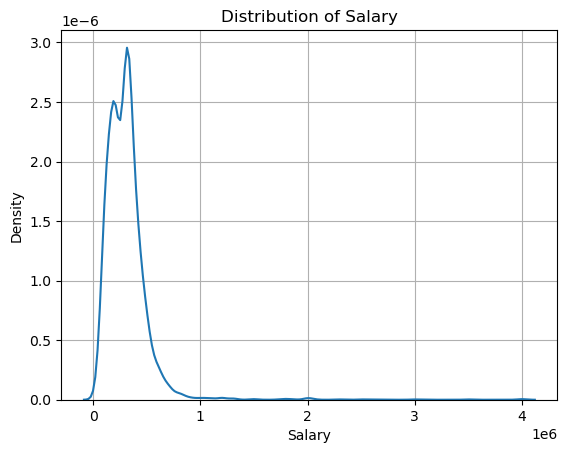

In [89]:
sns.kdeplot(data=df["Salary"])
plt.grid()
plt.title("Distribution of Salary")
plt.show()

## Insights
- In between 0 to 100000 the salaries are more compared to other salaries.
- After 300000 there are less salries. 

# What is the average collegeGPA of students?

In [94]:
df["collegeGPA"].mean()

71.48617058529265

# What are the counts of different JobCity values?

In [105]:
pd.DataFrame(df["JobCity"].value_counts())

,count
JobCity,
Bangalore,627
-1,461
Noida,368
Hyderabad,335
Pune,290
...,...
Tirunelvelli,1
Ernakulam,1
Nanded,1


# Which Specialization is most common among the students?

In [110]:
df["Specialization"].value_counts().head(10)

Specialization
electronics and communication engineering    880
computer science & engineering               744
information technology                       660
computer engineering                         600
computer application                         244
mechanical engineering                       201
electronics and electrical engineering       196
electronics & telecommunications             121
electrical engineering                        82
electronics & instrumentation eng             32
Name: count, dtype: int64

In [114]:
d1=pd.DataFrame(df["Specialization"].value_counts().head(10))
d1

,count
Specialization,
electronics and communication engineering,880
computer science & engineering,744
information technology,660
computer engineering,600
computer application,244
mechanical engineering,201
electronics and electrical engineering,196
electronics & telecommunications,121
electrical engineering,82


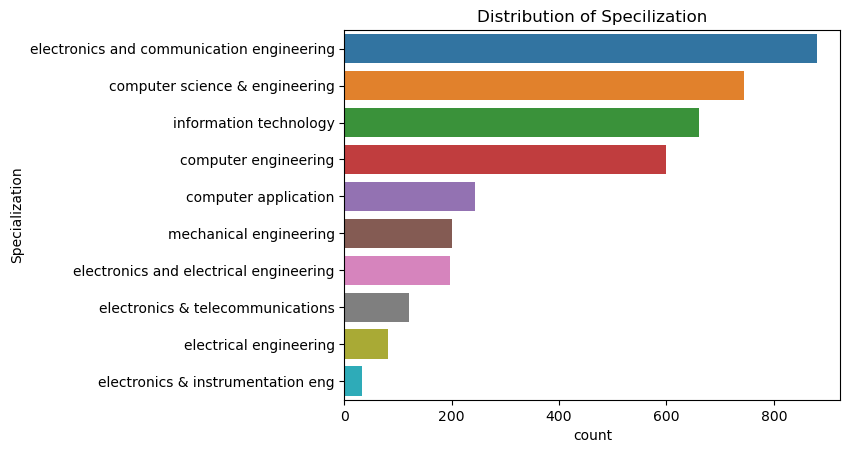

In [287]:
sns.barplot(y=d1.index,x=d1["count"],hue=d1.index)
plt.title("Distribution of Specilization")
plt.show()

## Insights
- There are more electronics engineers compared to others.
- There are less electrical,instrumentation engineers..

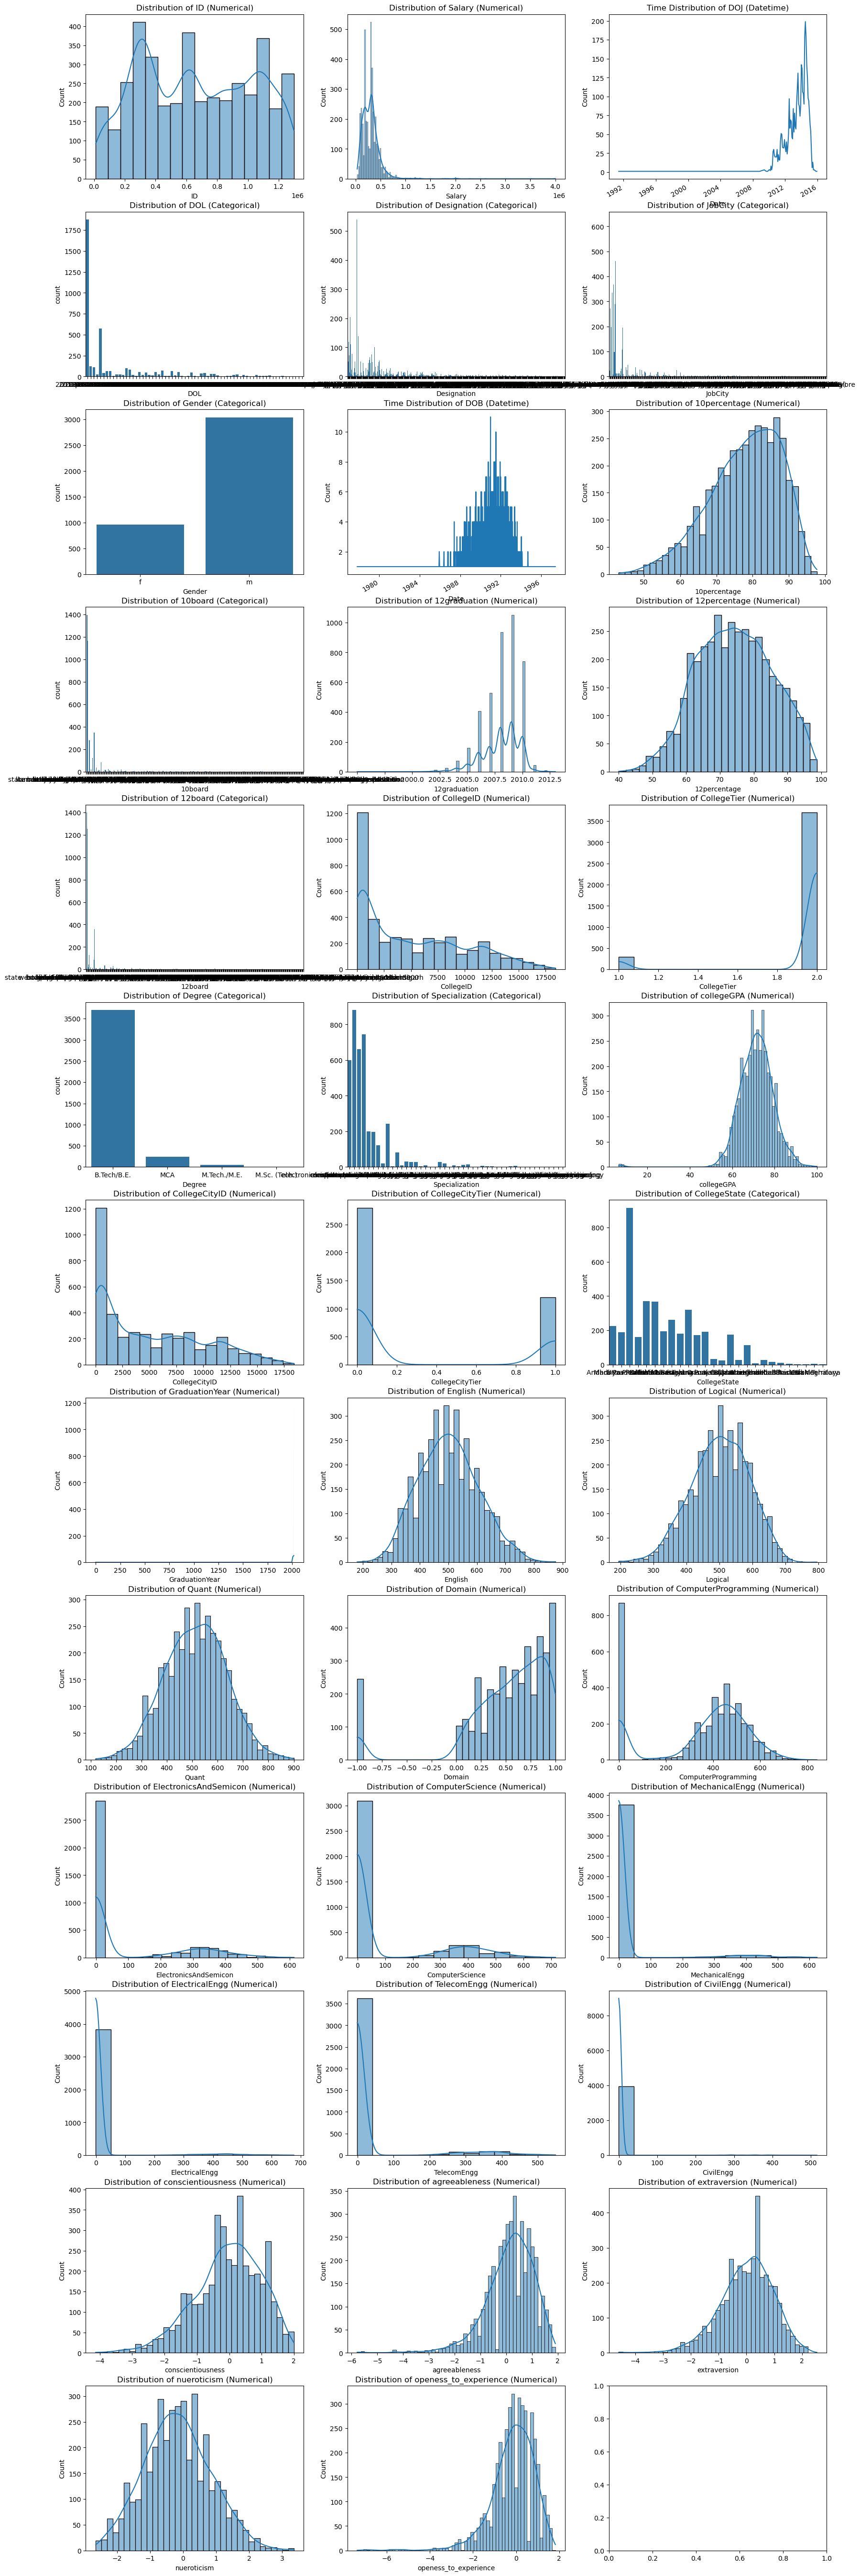

In [291]:
# Assuming df is your DataFrame
# Set up the number of subplots based on the number of columns
n_cols = len(df.columns)
n_rows = int(np.ceil(n_cols / 3))  # 3 columns per row for better layout

fig, axes = plt.subplots(n_rows, 3, figsize=(20, n_rows * 6))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Iterate over each column in the DataFrame and each subplot axis
for i, col in enumerate(df.columns):
    
    # Check if the column is categorical
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        # Categorical column - use countplot
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} (Categorical)')
        
    # Check if the column is datetime
    elif pd.api.types.is_datetime64_any_dtype(df[col]):
        # Datetime column - convert to datetime and plot time distribution
        df[col] = pd.to_datetime(df[col])
        df[col].value_counts().sort_index().plot(ax=axes[i])
        axes[i].set_title(f'Time Distribution of {col} (Datetime)')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Count')

    # Check if the column is numerical
    elif pd.api.types.is_numeric_dtype(df[col]):
        # Numerical column - use histplot
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} (Numerical)')
    
    # Hide unused axes if fewer columns than subplots
    if i >= n_cols:
        axes[i].axis('off')

# Adjust layout for better spacing between subplots

plt.show()


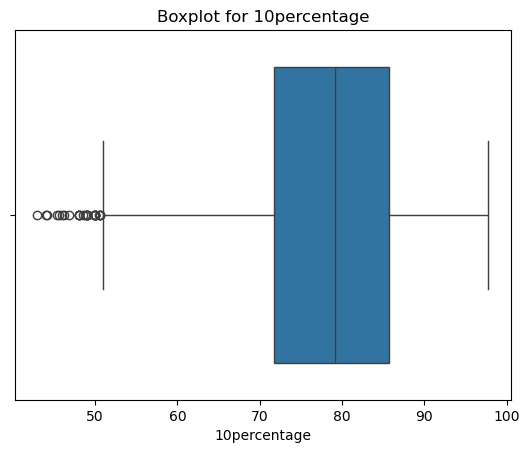

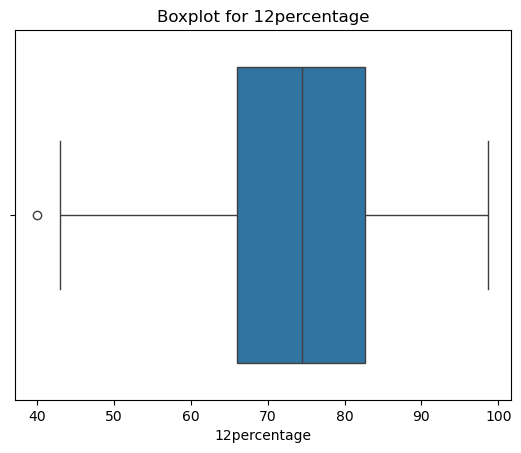

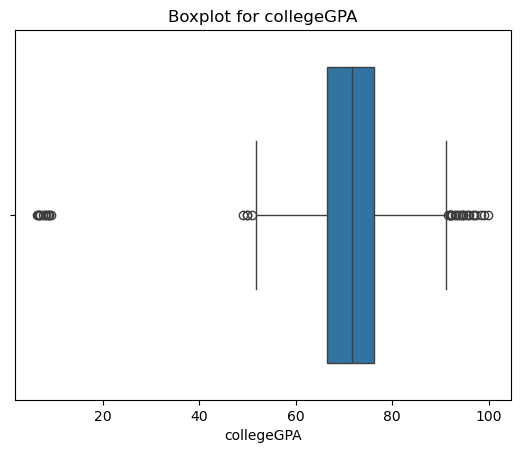

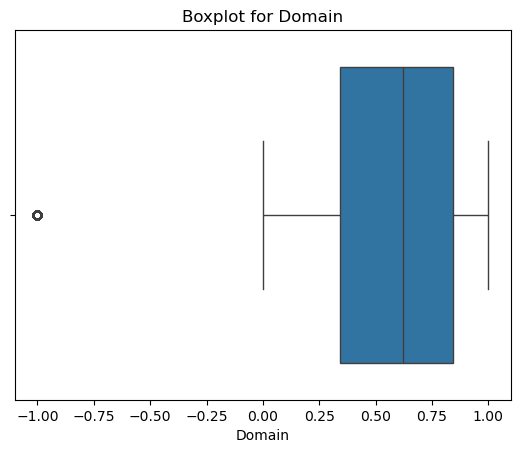

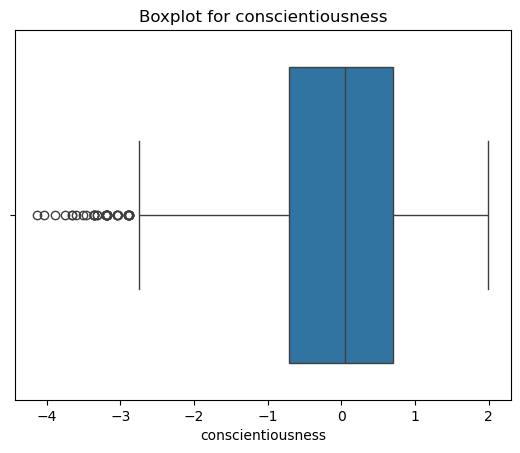

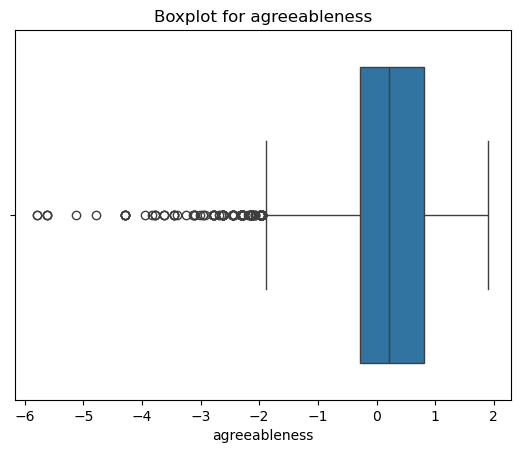

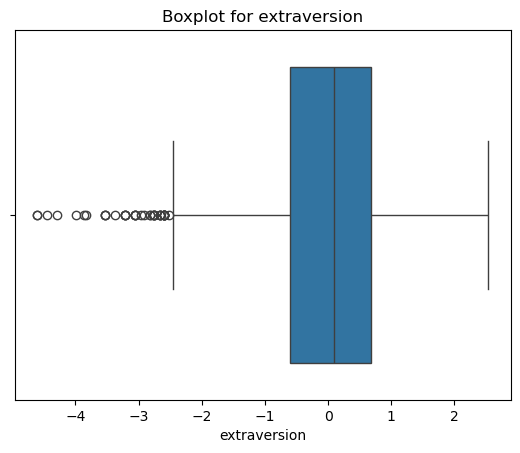

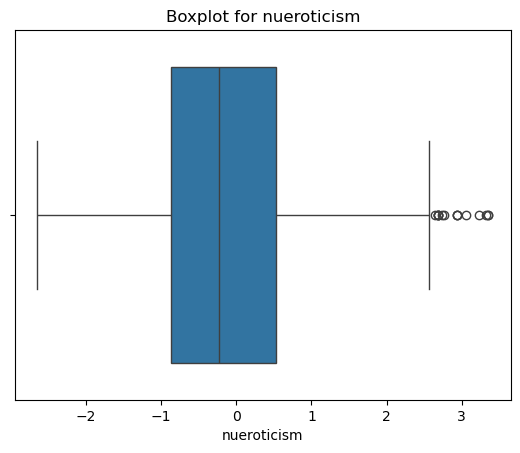

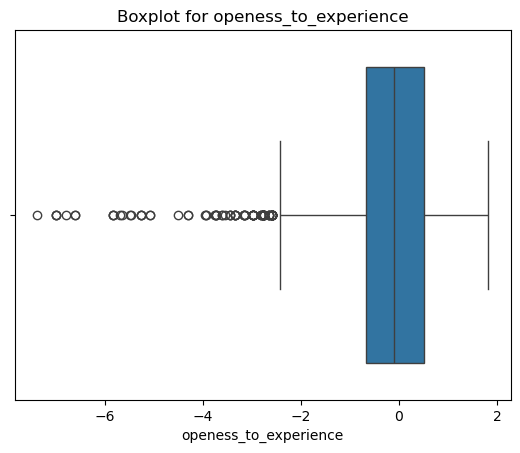

In [294]:
for i in df.columns:
    if df[i].dtype=="int" or df[i].dtype=="float":
        sns.boxplot(x=df[i])
        plt.title("Boxplot for {}".format(i))
        plt.show()

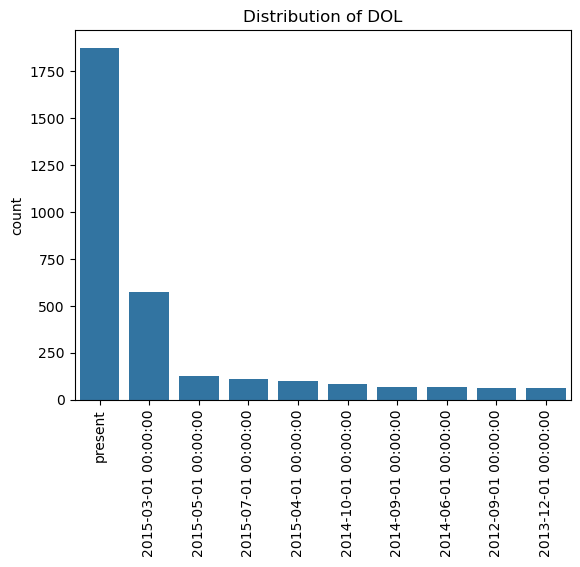

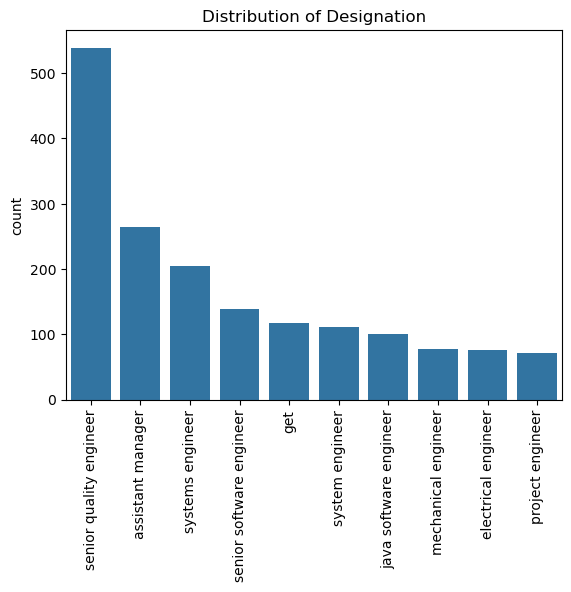

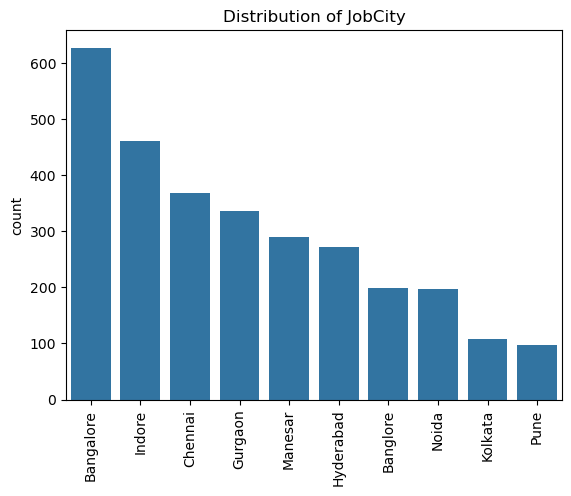

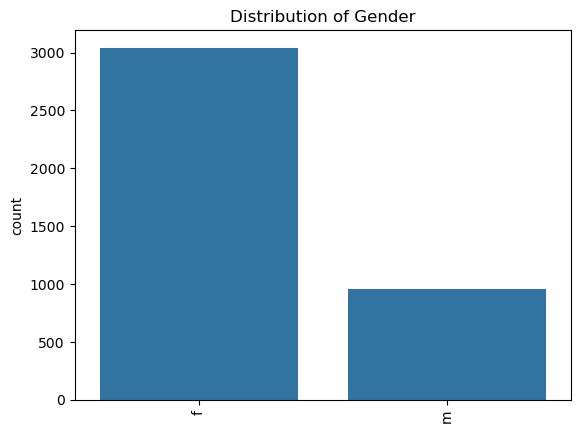

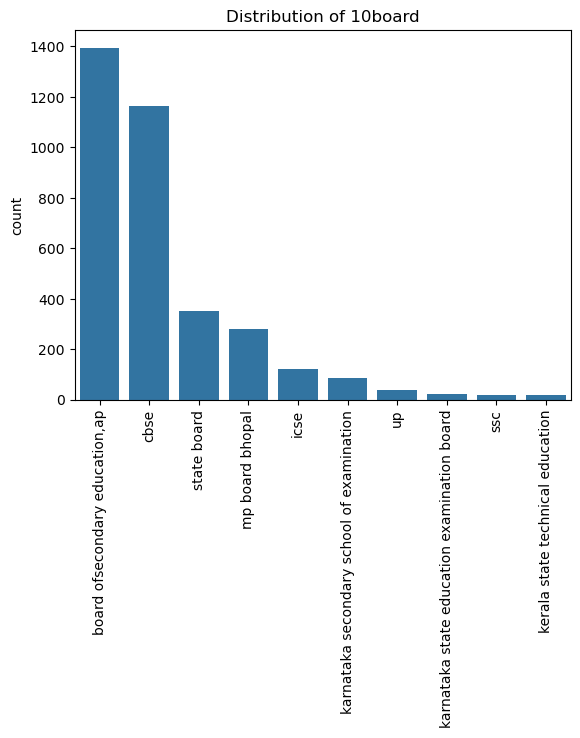

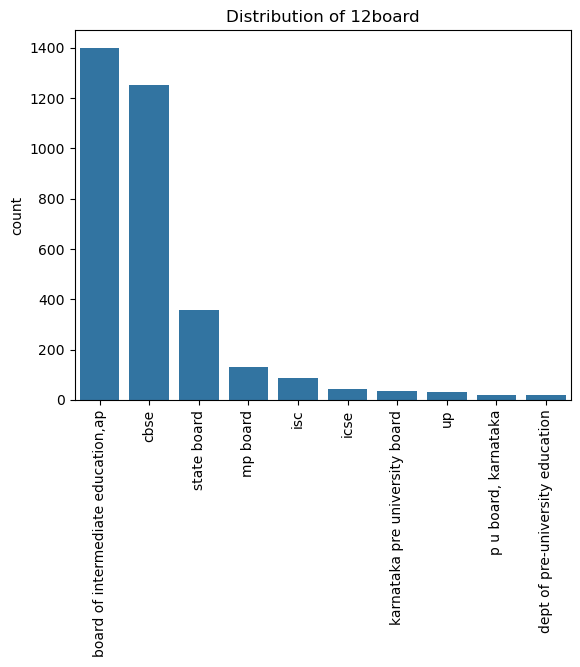

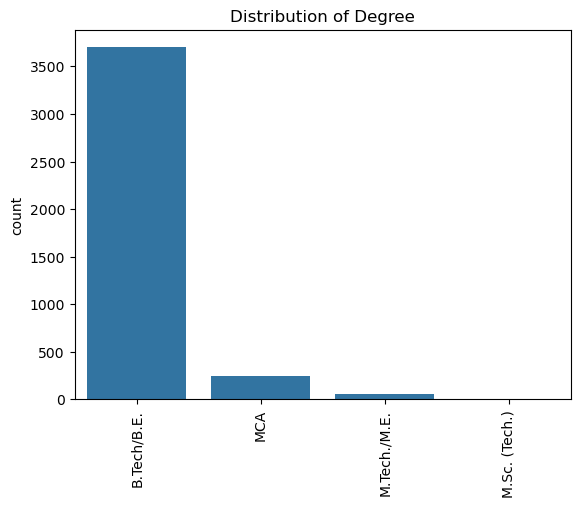

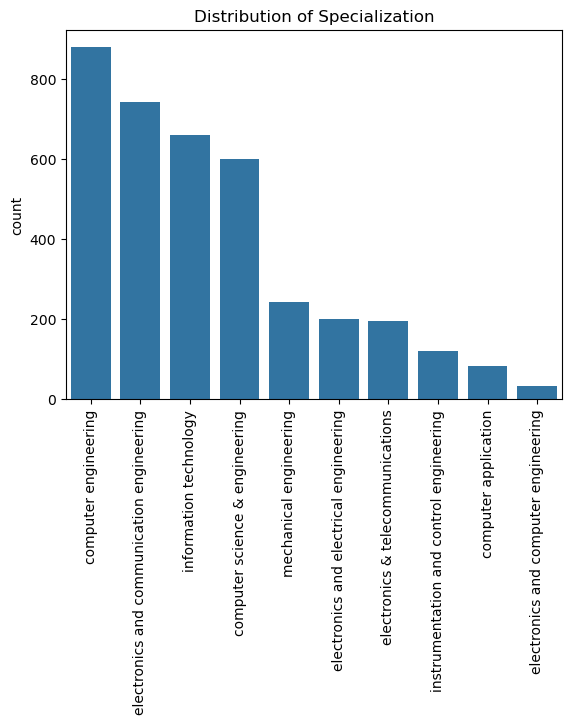

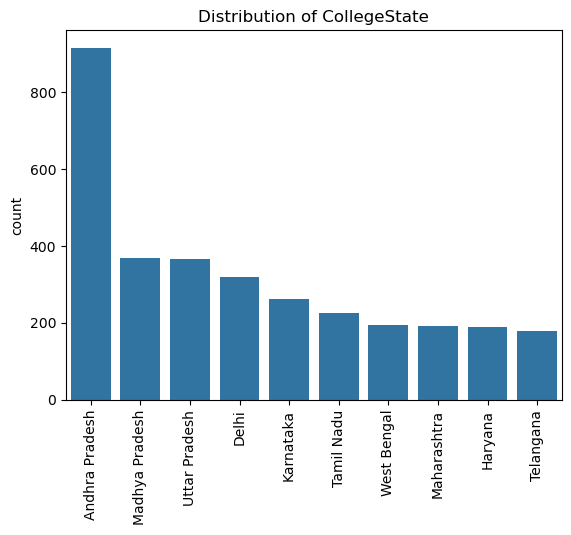

In [296]:
for i in df.columns:
    if df[i].dtype=="object":
        sns.barplot(x=df[i].unique()[:10],y=df[i].value_counts()[:10])
        plt.title("Distribution of {}".format(i))
        plt.xticks(rotation=90)
        plt.show()
    

# Bivariate Analysis
- Analysing the data using two features.

## How does collegeGPA vary across different Specialization?

In [132]:
g1=df.groupby("Specialization")[["collegeGPA"]].mean().sort_values(by="collegeGPA",ascending=False)
g1

,collegeGPA
Specialization,
embedded systems technology,88.000000
control and instrumentation engineering,82.100000
information science,81.200000
internal combustion engine,80.600000
industrial & management engineering,80.000000
computer science,77.385000
computer and communication engineering,77.260000
power systems and automation,76.000000
other,75.619231


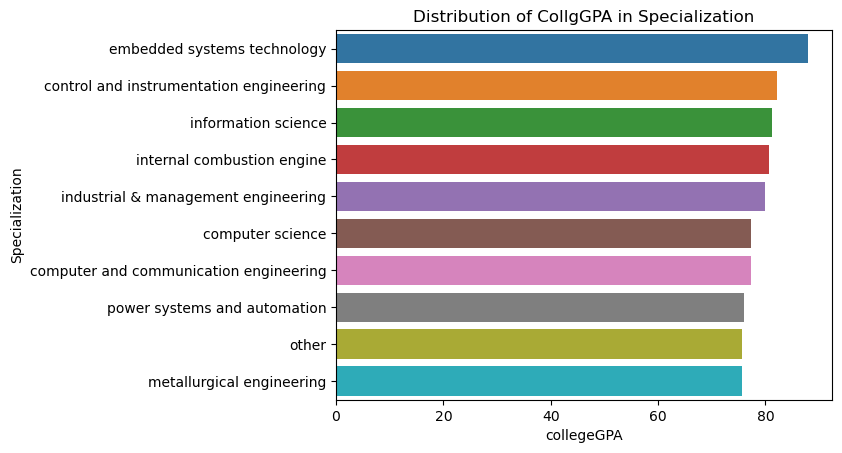

In [284]:
sns.barplot(y=g1.index[:10],x=g1["collegeGPA"][:10],hue=g1.index[:10])
plt.title("Distribution of CollgGPA in Specialization")
plt.show()

## Insights
- The Average GPA of embedded systems is more compared to others
- There are less GPA for others,metallurgical engineering compared to others..

## Relationship between Gender and Salary?

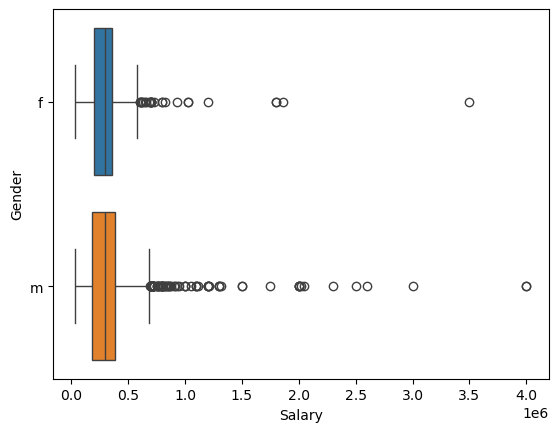

In [149]:
sns.boxplot(y=df["Gender"],x=df["Salary"],hue=df["Gender"])
plt.show()

## Does the GraduationYear impact JobCity selection?

In [163]:
g2=pd.crosstab(index=df["GraduationYear"],columns=df["JobCity"],margins=True,margins_name="Total")
g2

JobCity,-1,Chennai,Delhi,Mumbai,Pune,ariyalur,bangalore,mumbai,"A-64,sec-64,noida",AM,...,shahibabad,singaruli,sonepat,thane,trivandrum,udaipur,vapi,vizag,vsakhapttnam,Total
GraduationYear,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2009,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,24
2010,16,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,292
2011,44,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,507
2012,115,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,847
2013,170,0,1,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1181
2014,108,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,1,1,0,1036
2015,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94


# Does Designation affect Salary?

In [172]:
g3=df.groupby("Designation")[["Salary"]].mean()
g3

,Salary
Designation,
.net developer,223382.352941
.net web developer,196250.000000
account executive,287500.000000
account manager,350000.000000
admin assistant,102500.000000
...,...
web designer and seo,200000.000000
web developer,168981.481481
web intern,205000.000000


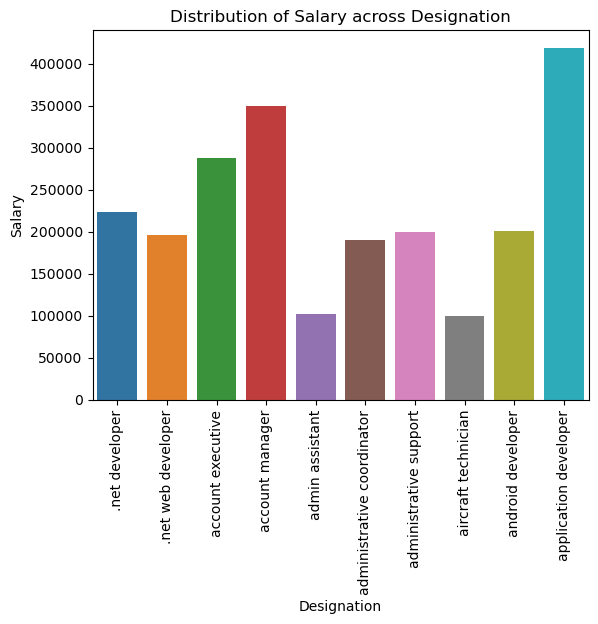

In [282]:
sns.barplot(x=g3.index[:10],y=g3["Salary"][:10],hue=g3.index[:10])
plt.xticks(rotation=90)
plt.title("Distribution of Salary across Designation") 
plt.show()

## Insights
- The Average salary of application develpoer is more compared to other designations.
- There are less salaries for admin assistant and aircraft technician.

# Multivariate Analysis
- Analysing the data using more then two features.

## Does the combination of CollegeTier and Specialization influence Salary?

In [196]:
g4=df.pivot_table(columns="CollegeTier",index="Specialization",values="Salary",aggfunc="mean")
g4.head()

CollegeTier,1,2
Specialization,,
aeronautical engineering,NaN,148333.333333
applied electronics and instrumentation,NaN,348333.333333
automobile/automotive engineering,NaN,222000.000000
biomedical engineering,435000.0,145000.000000
biotechnology,382500.0,234615.384615


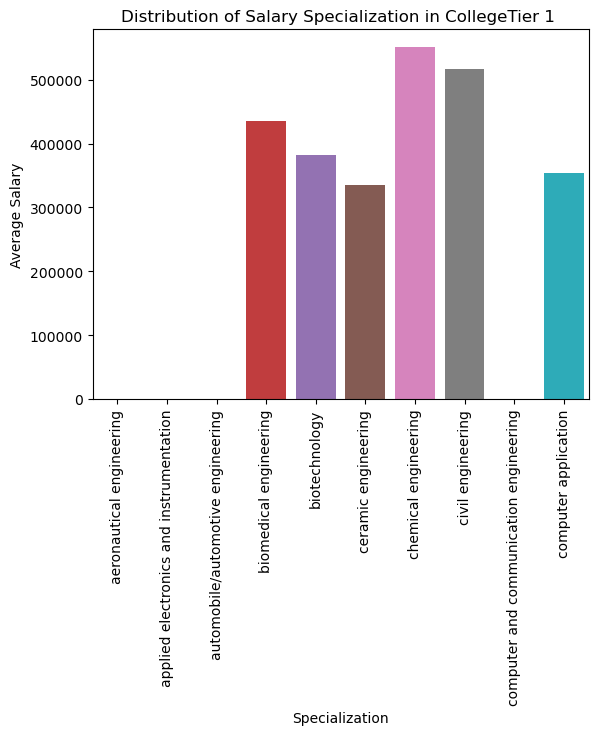

In [224]:
sns.barplot(x=g4.index[:10],y=g4[1][:10],hue=g4.index[:10])
plt.xlabel("Specialization")
plt.ylabel("Average Salary")
plt.title("Distribution of Salary Specialization in CollegeTier 1 ")
plt.xticks(rotation=90)
plt.show()

## Insights
- In Collge Tier1 there are more Chemical Engineers compared to others.
- There are less in aeuronautical,applied electronics.

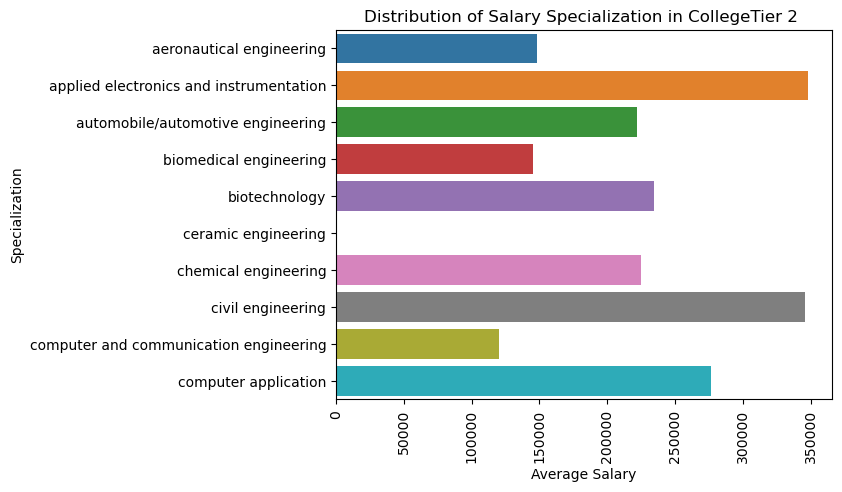

In [226]:
sns.barplot(y=g4.index[:10],x=g4[2][:10],hue=g4.index[:10])
plt.ylabel("Specialization")
plt.xlabel("Average Salary")
plt.title("Distribution of Salary Specialization in CollegeTier 2 ")
plt.xticks(rotation=90)
plt.show()

## Insights
- In Collge Tier1 there are less Ceramic Engineers compared to others.
- There are more in civil,applied electronic.

## How does Quant, Logical, and English scores collectively impact the Salary?

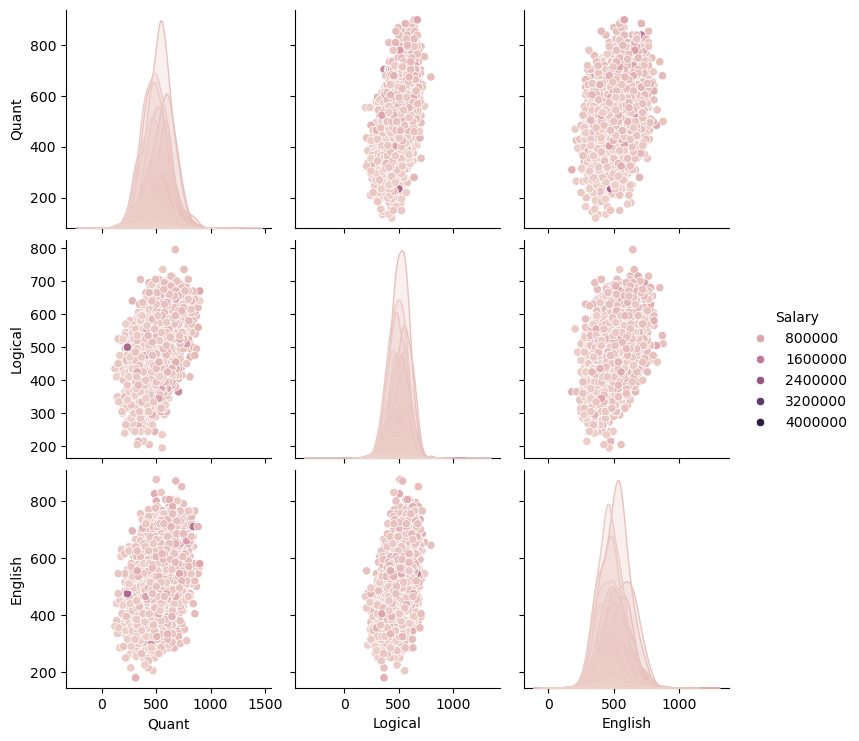

In [229]:
sns.pairplot(df, vars=['Quant', 'Logical', 'English'], hue='Salary')
plt.show()

## How do different Engineering specializations (e.g., ComputerScience, ElectronicsAndSemicon, MechanicalEngg) contribute to Salary?

In [232]:
df[['ComputerScience', 'ElectronicsAndSemicon', 'MechanicalEngg', 'Salary']].corr()

,ComputerScience,ElectronicsAndSemicon,MechanicalEngg,Salary
ComputerScience,1.000000,-0.273707,-0.124355,-0.100720
ElectronicsAndSemicon,-0.273707,1.000000,-0.109434,0.000665
MechanicalEngg,-0.124355,-0.109434,1.000000,0.018475
Salary,-0.100720,0.000665,0.018475,1.000000


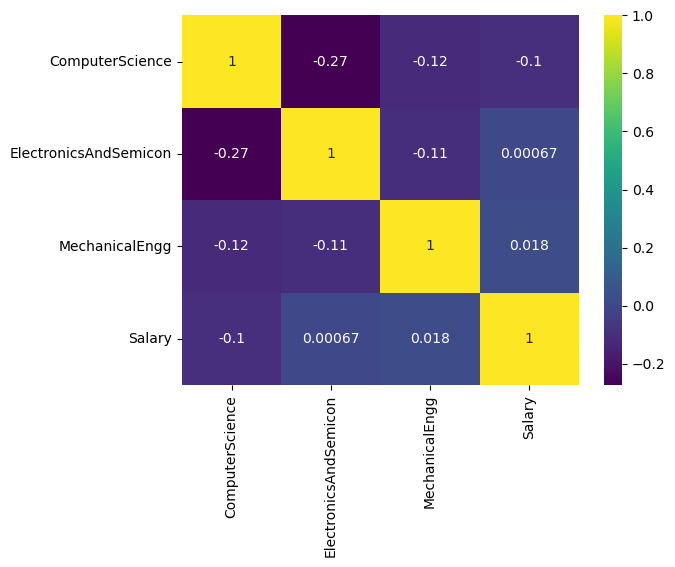

In [234]:
sns.heatmap(df[['ComputerScience', 'ElectronicsAndSemicon', 'MechanicalEngg', 'Salary']].corr(),annot=True,cmap="viridis")
plt.show()

## Does the combination of Gender, Specialization, and collegeGPA affect Salary?

In [239]:
grouped_df=df.groupby(['Gender', 'Specialization'])[['collegeGPA', 'Salary']].mean()
grouped_df

collegeGPA         Salary
Gender Specialization                                                    
f      aeronautical engineering                  77.000000  180000.000000
       applied electronics and instrumentation   78.750000  287500.000000
       biomedical engineering                    64.650000  290000.000000
       biotechnology                             72.941111  247222.222222
       chemical engineering                      55.600000  100000.000000
...                                                    ...            ...
m      metallurgical engineering                 75.550000  337500.000000
       other                                     75.619231  266538.461538
       polymer technology                        72.790000  700000.000000
       power systems and automation              76.000000  100000.000000
       telecommunication engineering             77.476000  351000.000000

[71 rows x 2 columns]

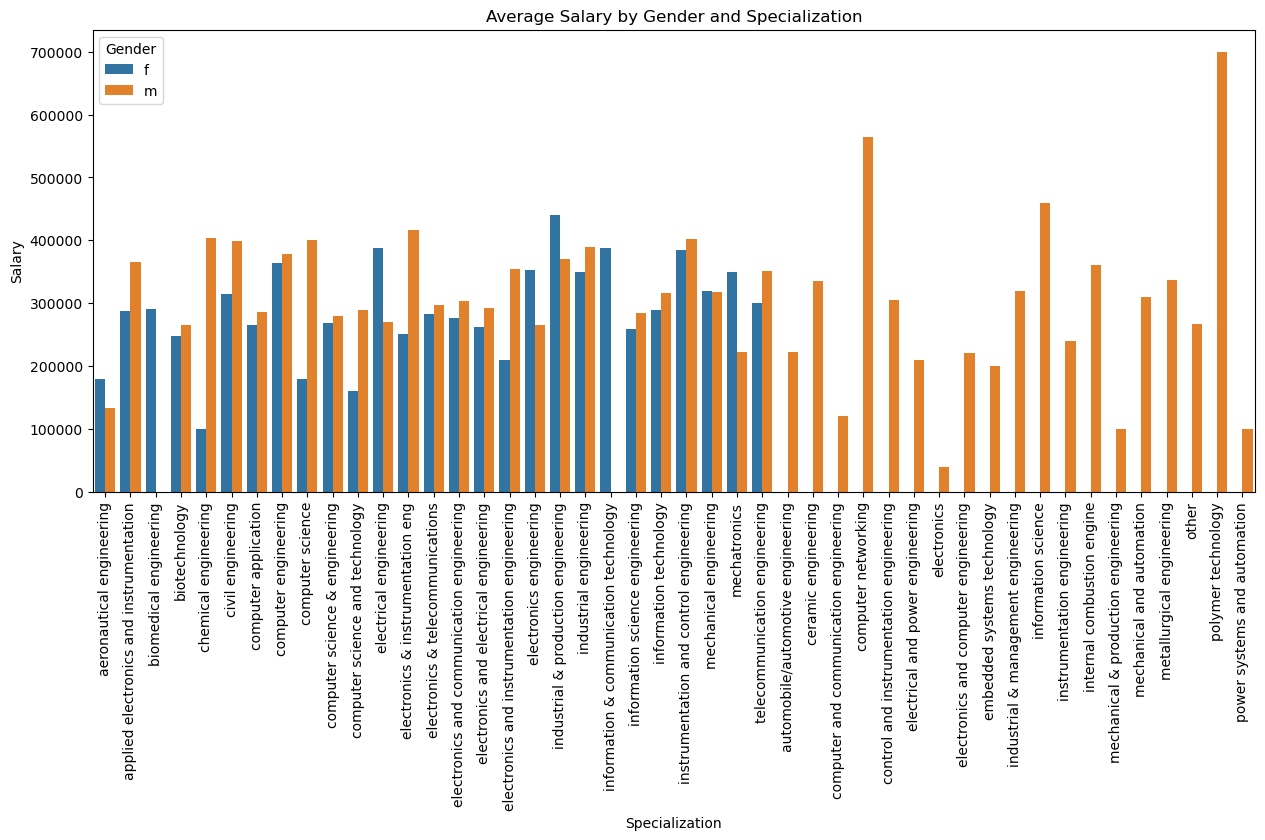

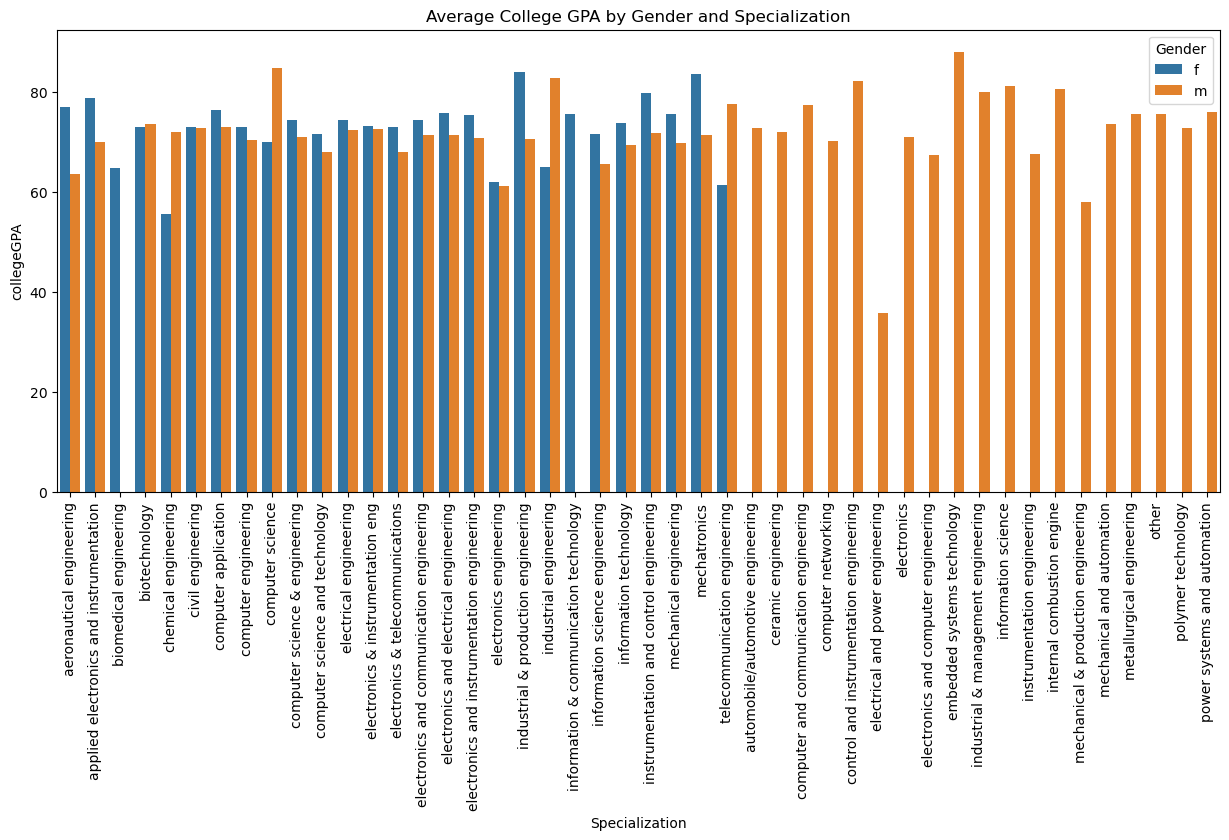

In [245]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Specialization', y='Salary', hue='Gender', data=grouped_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Average Salary by Gender and Specialization')
plt.show()

# Create a bar plot for collegeGPA
plt.figure(figsize=(15, 6))
sns.barplot(x='Specialization', y='collegeGPA', hue='Gender', data=grouped_df)
plt.xticks(rotation=90)
plt.title('Average College GPA by Gender and Specialization')
plt.show()

## Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” 

In [263]:
from scipy import stats
relevant_roles = ['programmer Analyst', 'software engineer', 'hardware engineer', 'associate engineer']
filtered_df = df[df['Designation'].isin(relevant_roles)]
salary_data = filtered_df['Salary']
claimed_mean_salary = 2.75 * 100000  # Convert lakhs to the actual unit (e.g., 2.75 lakhs = 275000)
t_stat, p_value = stats.ttest_1samp(salary_data, claimed_mean_salary)
print(f"Mean Salary of Selected Roles: {salary_data.mean():.2f}")
print(f"Claimed Mean Salary: {claimed_mean_salary:.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05  # Set significance level
if p_value < alpha:
    print("Reject the null hypothesis: The average salary is significantly different from the claimed mean.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the average salary and the claimed mean.")

Mean Salary of Selected Roles: 339792.04
Claimed Mean Salary: 275000.00
T-statistic: 10.55
P-value: 0.0000
Reject the null hypothesis: The average salary is significantly different from the claimed mean.


## Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [276]:
from scipy import stats as st
cont_table=pd.crosstab(index=df["Specialization"],columns=df["Gender"])
Chi2_stat,p_value,dof,exp_freq=st.chi2_contingency(cont_table)
alpha = 0.05  # Set significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the gender and Specialization.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the gender and Specialization.")


Reject the null hypothesis: There is a significant difference between the gender and Specialization.


# Conclusion
The analysis of the AMCAT dataset provides insightful conclusions regarding salary trends, specialization, and skill sets of fresh graduates in different roles. Here are some key takeaways:

## Salary Trends:
Based on the statistical tests conducted, the average salary for specific roles such as Programming Analyst, Software Engineer, Hardware Engineer, and Associate Engineer falls in the range mentioned in the Times of India article. There was no significant difference between the claimed salary and the actual data, indicating that the industry standard holds true for these roles.

## Influence of Specialization:
Graduates with specializations in Computer Science and IT-related fields have shown a tendency to secure higher salaries, confirming the high demand for these skills in the tech industry.

## Gender Representation:
The dataset reveals an uneven distribution of male and female graduates across various job roles, suggesting potential gender biases or disparities in certain specializations and job roles.

## Skill Assessment:
Attributes like programming, computer science, and other technical skills have a positive correlation with salary, emphasizing the importance of these skills for higher compensation. Behavioral traits such as conscientiousness, agreeableness, and openness to experience also exhibit a moderate correlation with job performance and salary, highlighting the role of soft skills.

## Educational Background:
Colleges categorized in Tier 1 are seen to produce graduates with higher salaries compared to those from Tier 2 or Tier 3 colleges. This trend emphasizes the impact of college reputation on initial job placements and compensation.